# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
cyrpto_data = {
    "coins": [1.2, 5.3]
}
coins = ["BTC", "ETH"]
df_coins = pd.DataFrame(cyrpto_data, index=coins)

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
response = requests.get(btc_url)
response_btc = response.json()

response = requests.get(eth_url)
response_eth = response.json()

In [6]:
df_coins

,coins
BTC,1.2
ETH,5.3


In [7]:
# Fetch current BTC price
btc_price=response_btc['data']['1']['quotes']['USD']['price']
my_btc = df_coins.loc["BTC"]["coins"]
# Fetch current ETH price
eth_price=response_eth['data']['1027']['quotes']['USD']['price']
my_eth = df_coins.loc["ETH"]["coins"]

# Compute current value of my crpto
my_btc_value =my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $21378.41
The current value of your 5.3 ETH is $2521.26


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
shares_data = {
    "shares": [200, 50]
}

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = 'PK62HY50S24LIBHXTA12'
alpaca_secret_key = 'OkQOJWRMcWMbFRHgM3eW20Rk7PnOpLD5LkHj4SFj'

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2020-11-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]
df_shares = pd.DataFrame(shares_data, index=tickers)
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2020-11-16 00:00:00-05:00  117.61  117.67  117.58  117.64  5501903  360.98   

                                                             
                             high     low   close    volume  
2020-11-16 00:00:00-05:00  362.49  359.59  362.43  55926517

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.64
Current SPY closing price: $362.43


In [12]:
# Compute the current value of shares
my_spy = df_shares.loc["SPY"]["shares"]
my_agg = df_shares.loc["AGG"]["shares"]
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18121.50
The current value of your 200 AGG shares is $23528.00


### Savings Health Analysis

In [13]:
# Set monthly household income
income=12000

# Create savings DataFrame
saving = [
    my_btc_value+my_eth_value,
    my_spy_value+my_agg_value
]

# Display savings DataFrame
df_savings = pd.DataFrame(saving, columns=['amount'],index=['crypto','shares'])

display(df_savings)

,amount
crypto,23899.671
shares,41649.500


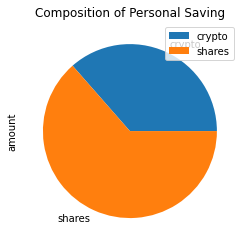

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='Composition of Personal Saving');

In [22]:
# Set ideal emergency fund
emergency_fund = income * 3

# Calculate total amount of savings
total_saving = float(df_savings.sum())

# Validate saving health
if total_saving > emergency_fund:
    print ('Congratulations! You have enough money in your emergency fund.')
else:
    print ('You need to save more')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-11-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-18', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597  206.04   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263  208.59   
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587  209.45   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639  209.38   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821  207.87   

                                                             
                             high     low   close    volume  
2015-11-18 00:00:00-05:00  208.90  205.99  208.71  94448031  
2015-11-19 00:00:00-05:00  209.05  208.20  208.53  61897641  
2015-11-20 00:00:00-05:00  210.12  208.86  209.35  67021762  
2015-11-23 00:00:00-05:00  209.98  208.52  209.06  54738608  
2015-11-24 00:00:00-05:00  209.83  207.41  209.38  81748691

In [32]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [33]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263   
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-11-18 00:00:00-05:00          NaN  206.04  208.90  205.99  208.71   
2015-11-19 00:00:00-05:00     0.000552  208.59  209.05  208.20  208.53   
2015-11-20 00:00:00-05:00    -0.000552  209.45  210.12  208.86  209.35   
2015-11-23 00:00:00-05:00     0.000552  209.38  209.98  208.52  209.06   
2015-11-24 00:00:00-05:00     0.000460  207.87  209.83  207.41  209.38   

                                                  
                             volume daily_return  
2015-11-18 00:00:00-05:00  94448031          NaN  
2015-11-19 00:00:00-05:00  61897641    -0.000862  
2015-11-20 00:00:00-05:00  67021762     0.003932  
2015-11-23 00:00:00-05:00  54738608    -0.001385  
2015-11-24 00:00:00-05:00  81748691     0.001531

In [34]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006339,1.001384,0.991775,1.009808,1.003208,0.999790,1.004828,1.005903,1.001132,1.001213,...,1.002010,0.993077,0.998208,0.990271,0.998744,1.005693,1.008387,0.994036,1.003101,0.995985
2,1.001623,1.000745,0.992275,1.016360,1.000996,0.996259,1.006094,0.997983,1.001808,0.998326,...,1.005559,0.990378,1.003701,0.994567,0.994860,1.003657,1.011061,0.991930,1.005963,0.994778
3,1.001589,1.011635,0.983198,1.006449,1.002386,0.989078,1.000570,1.002421,1.003071,1.003257,...,1.007767,0.994208,1.005407,0.989946,0.992327,1.004018,1.002743,0.990772,1.004612,0.993029
4,0.998020,1.014676,0.984405,1.004724,1.005439,0.991272,1.000823,1.000909,0.998206,1.005118,...,1.011321,1.002594,1.001096,0.988887,0.989682,1.007323,0.997099,0.984176,1.006339,0.990519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.297696,5.194947,8.901247,9.730500,5.485117,5.356724,3.482047,7.857867,8.299257,16.103056,...,5.771422,7.407737,5.261283,3.981617,6.789486,2.383318,3.737985,6.397409,4.770261,4.913689
7557,8.371006,5.213557,8.983410,9.758815,5.449595,5.375670,3.506907,7.917737,8.335775,16.269568,...,5.802695,7.396606,5.318709,3.952681,6.777556,2.403105,3.758967,6.374038,4.782613,4.938888
7558,8.412381,5.174039,8.977761,9.714528,5.449976,5.345219,3.498110,8.023475,8.290680,16.275338,...,5.807449,7.344511,5.382020,3.949583,6.775761,2.416458,3.783556,6.401450,4.813597,4.945669
7559,8.358066,5.152290,9.013187,9.702890,5.435919,5.369374,3.489675,8.005791,8.285107,16.312377,...,5.795506,7.364539,5.330008,3.943902,6.722558,2.436046,3.823301,6.442203,4.836172,4.963527


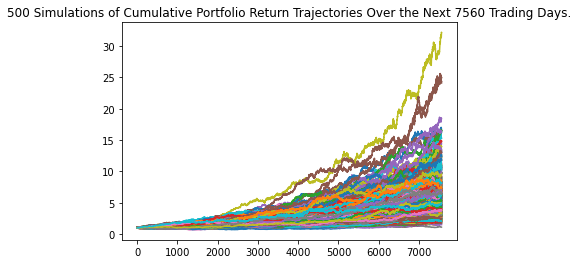

In [36]:
# Plot simulation outcomes
MC_thirty_year.plot_simulation();

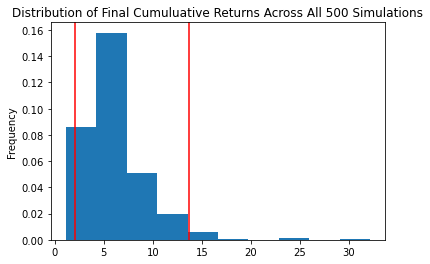

In [37]:
# Plot probability distribution and confidence intervals
MC_thirty_year.plot_distribution();

### Retirement Analysis

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_thirty_year.summarize_cumulative_return()


# Print summary statistics
print(summary)

count           500.000000
mean              6.137819
std               3.246204
min               1.126951
25%               4.088681
50%               5.638290
75%               7.285894
max              32.153229
95% CI Lower      2.084205
95% CI Upper     13.689106
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [39]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[-2] * initial_investment,2)
ci_upper = round(summary[-1] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41684.1 and $273782.12


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[-2] * initial_investment,2)
ci_upper = round(summary[-1] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $62526.14 and $410673.18


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [43]:
MC_five_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263   
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-11-18 00:00:00-05:00          NaN  206.04  208.90  205.99  208.71   
2015-11-19 00:00:00-05:00     0.000552  208.59  209.05  208.20  208.53   
2015-11-20 00:00:00-05:00    -0.000552  209.45  210.12  208.86  209.35   
2015-11-23 00:00:00-05:00     0.000552  209.38  209.98  208.52  209.06   
2015-11-24 00:00:00-05:00     0.000460  207.87  209.83  207.41  209.38   

                                                  
                             volume daily_return  
2015-11-18 00:00:00-05:00  94448031          NaN  
2015-11-19 00:00:00-05:00  61897641    -0.000862  
2015-11-20 00:00:00-05:00  67021762     0.003932  
2015-11-23 00:00:00-05:00  54738608    -0.001385  
2015-11-24 00:00:00-05:00  81748691     0.001531

In [44]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000891,1.002014,0.999678,0.998999,1.002220,0.994188,0.997854,1.003211,1.005296,1.001122,...,0.996143,0.993808,0.999593,1.004583,0.998033,0.994886,0.990708,0.994807,1.006252,1.002666
2,1.008481,1.017208,0.995470,1.002373,0.998985,1.007100,1.002711,1.014145,1.004518,0.999358,...,0.999517,0.995582,0.993993,1.006347,0.999382,0.991154,0.999222,0.990764,1.009322,1.002026
3,0.996917,1.009469,0.988926,0.999450,0.994672,1.014619,1.006526,1.013717,0.999791,0.996405,...,0.995128,0.993347,0.993087,1.006341,1.001668,0.986285,0.993109,0.996887,0.999450,1.005393
4,0.998084,1.008755,0.992708,0.997582,1.000380,1.021543,1.014285,1.015015,0.991701,0.993247,...,0.995973,0.991550,0.996385,1.007022,1.000223,0.978136,0.990622,0.999688,0.999312,1.010697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.145201,1.105745,1.415211,1.268346,1.014646,1.137129,0.990980,1.469919,1.498652,1.421576,...,2.328451,1.268704,1.625658,1.505901,1.579220,1.213465,1.574642,1.541280,1.324230,1.623262
1257,1.143407,1.103393,1.415755,1.278148,1.014872,1.134430,0.981915,1.472610,1.496241,1.424203,...,2.334506,1.267171,1.648880,1.502607,1.580035,1.213163,1.580712,1.545886,1.312053,1.623614
1258,1.139814,1.112021,1.408711,1.276877,1.017165,1.139544,0.986861,1.469776,1.485691,1.420816,...,2.309054,1.257039,1.653719,1.495959,1.582626,1.211127,1.580392,1.543038,1.313490,1.624733
1259,1.144820,1.112294,1.418951,1.288586,1.017043,1.146903,0.984301,1.457202,1.493940,1.419654,...,2.299679,1.266323,1.659366,1.508045,1.580315,1.216272,1.574794,1.563812,1.323309,1.611020


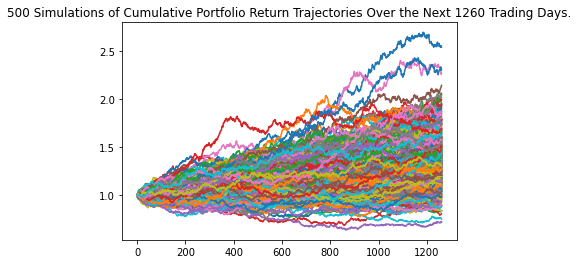

In [45]:
# Plot simulation outcomes
MC_five_year.plot_simulation()

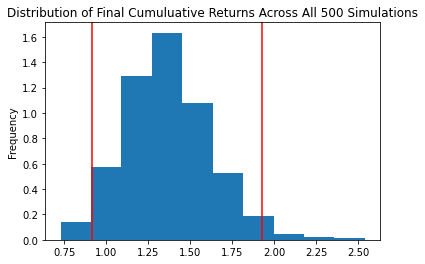

In [46]:
# Plot probability distribution and confidence intervals
MC_five_year.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
summary5 = MC_five_year.summarize_cumulative_return()


# Print summary statistics
print(summary5)

count           500.000000
mean              1.368319
std               0.258447
min               0.728180
25%               1.178759
50%               1.348712
75%               1.512789
max               2.540891
95% CI Lower      0.917374
95% CI Upper      1.927709
Name: 1260, dtype: float64


In [49]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary5[-2] * initial_investment,2)
ci_upper_five = round(summary5[-1] * initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18347.48 and $38554.18


### Ten Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [51]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000475,0.998380,0.994867,0.992102,1.007759,1.002697,0.999537,1.003533,1.001173,1.008654,...,0.999639,0.989881,1.006513,1.003658,0.996761,0.998972,1.003711,0.998777,0.996588,1.002925
2,0.996972,1.003311,0.995398,0.994617,1.005072,1.006203,1.001873,0.998747,1.003232,1.011066,...,0.999588,0.995298,1.011831,1.009148,0.986117,1.004496,1.006500,0.994129,0.989009,1.006911
3,0.995187,0.995883,0.998197,0.992559,1.010884,1.015204,0.995244,1.006556,1.013202,1.013119,...,0.994286,0.992860,1.009298,1.012232,0.980935,1.011772,1.006347,0.994737,0.974516,1.000130
4,0.998090,0.995634,1.014460,0.997257,1.010224,1.015230,0.992648,1.001351,1.016362,1.018021,...,0.991516,1.001694,1.002137,1.016872,0.978829,1.007762,1.009645,0.989719,0.959812,1.001774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.609506,2.282077,1.658197,2.396528,1.414307,2.090639,1.265288,2.106285,2.993289,1.169255,...,1.562141,1.466748,2.155823,1.957205,1.617620,0.892386,1.637874,1.707651,1.304826,1.616412
2517,1.606837,2.282304,1.653901,2.406929,1.416497,2.106346,1.275496,2.112304,2.977249,1.165216,...,1.566485,1.475039,2.165501,1.936575,1.621181,0.892431,1.634069,1.699436,1.305725,1.614713
2518,1.612870,2.287385,1.649854,2.419234,1.420147,2.096631,1.274352,2.112481,2.964705,1.161905,...,1.568339,1.475887,2.149850,1.937533,1.604659,0.892489,1.640906,1.687700,1.289558,1.613355
2519,1.615105,2.292992,1.647237,2.420703,1.418973,2.088639,1.282587,2.082953,2.987899,1.158370,...,1.580089,1.471492,2.144983,1.938516,1.618497,0.887641,1.642615,1.692494,1.295996,1.606757


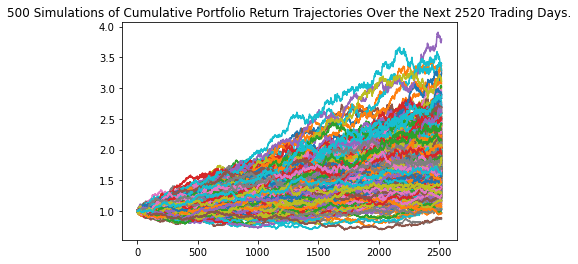

In [52]:
# Plot simulation outcomes
MC_ten_year.plot_simulation();

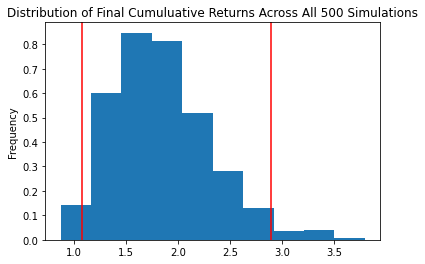

In [54]:
# Plot probability distribution and confidence intervals
MC_ten_year.plot_distribution();

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
summary10=MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(summary10)

count           500.000000
mean              1.833010
std               0.473508
min               0.868865
25%               1.484269
50%               1.783171
75%               2.102813
max               3.796375
95% CI Lower      1.074376
95% CI Upper      2.895714
Name: 2520, dtype: float64


In [56]:
# Set initial investment
initial_investment=20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_ten=round(summary10[-2] * initial_investment,2)
ci_lower_ten=round(summary10[-1] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $57914.28 and $21487.52
